In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
zomato=pd.read_csv('zomato.csv', encoding='latin-1')

In [3]:
zomato.head(1)
zomato.shape

(9551, 21)

In [4]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
Restaurant ID           9551 non-null int64
Restaurant Name         9551 non-null object
Country Code            9551 non-null int64
City                    9551 non-null object
Address                 9551 non-null object
Locality                9551 non-null object
Locality Verbose        9551 non-null object
Longitude               9551 non-null float64
Latitude                9551 non-null float64
Cuisines                9542 non-null object
Average Cost for two    9551 non-null int64
Currency                9551 non-null object
Has Table booking       9551 non-null object
Has Online delivery     9551 non-null object
Is delivering now       9551 non-null object
Switch to order menu    9551 non-null object
Price range             9551 non-null int64
Aggregate rating        9551 non-null float64
Rating color            9551 non-null object
Rating text             9551 non-null o

In [5]:
zomato['Country Code'].value_counts()

zomato=zomato[zomato['Country Code']==1]
len(zomato)

8652

In [6]:
zomato['City'].value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Amritsar          21
Guwahati          21
Bhubaneshwar      21
Lucknow           21
Vizag             20
Varanasi          20
Ranchi            20
Coimbatore        20
Mangalore         20
Surat             20
Indore            20
Kanpur            20
Aurangabad        20
Ludhiana          20
Goa               20
Allahabad         20
Kolkata           20
Mysore            20
Bangalore         20
Nagpur            20
Jaipur            20
Kochi             20
Bhopal            20
Patna             20
Dehradun          20
Nashik            20
Chennai           20
Puducherry        20
Mumbai            20
Vadodara          20
Pune              20
Agra              20
Hyderabad         18
Chandigarh        18
Secunderabad       2
Mohali             1
Panchkula          1
Name: City, dtype: int64

In [7]:
mask1=zomato['City']=='New Delhi'
mask2=zomato['City']=='Noida'
mask3=zomato['City']=='Gurgaon'

zomato=zomato[mask1 | mask2 | mask3]
len(zomato)

7671

In [8]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7671 entries, 1161 to 9112
Data columns (total 21 columns):
Restaurant ID           7671 non-null int64
Restaurant Name         7671 non-null object
Country Code            7671 non-null int64
City                    7671 non-null object
Address                 7671 non-null object
Locality                7671 non-null object
Locality Verbose        7671 non-null object
Longitude               7671 non-null float64
Latitude                7671 non-null float64
Cuisines                7671 non-null object
Average Cost for two    7671 non-null int64
Currency                7671 non-null object
Has Table booking       7671 non-null object
Has Online delivery     7671 non-null object
Is delivering now       7671 non-null object
Switch to order menu    7671 non-null object
Price range             7671 non-null int64
Aggregate rating        7671 non-null float64
Rating color            7671 non-null object
Rating text             7671 non-nul

Restaurant ID          -0.144228
Country Code                 NaN
Longitude               0.071854
Latitude                0.070816
Average Cost for two    1.000000
Price range             0.848425
Aggregate rating        0.329785
Votes                   0.297741
Name: Average Cost for two, dtype: float64

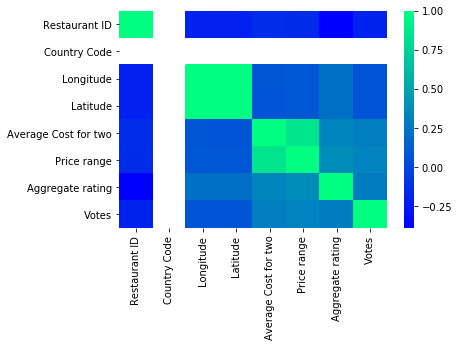

In [9]:
sns.heatmap(zomato.corr(),cmap='winter')
zomato.corr()['Average Cost for two']

In [10]:
zomato['Restaurant Name'].value_counts()

Cafe Coffee Day                          81
Domino's Pizza                           75
Subway                                   60
Green Chick Chop                         47
McDonald's                               44
Keventers                                33
Giani                                    28
Baskin Robbins                           26
Barista                                  21
Pizza Hut                                20
Dunkin' Donuts                           20
Giani's                                  20
Pizza Hut Delivery                       19
Wah Ji Wah                               19
Costa Coffee                             19
Twenty Four Seven                        18
Chaayos                                  18
Sagar Ratna                              17
Republic of Chicken                      17
Starbucks                                17
Pind Balluchi                            16
Haldiram's                               15
Aggarwal Sweets                 

In [11]:
zomato.drop(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Currency', 'Rating color', 'Rating text'], axis=1, inplace=True)

In [12]:
zomato.head(2)

zomato.drop(['Has Table booking', 'Has Online delivery', 'Is delivering now','Switch to order menu'], axis=1, inplace=True)

In [13]:
zomato.head(2)

,Longitude,Latitude,Cuisines,Average Cost for two,Price range,Aggregate rating,Votes
1161,77.03931,28.424831,"Cafe, Beverages",350,1,3.4,16
1162,77.03922,28.424913,"North Indian, Mughlai",800,2,2.7,80


In [14]:
cuisines=zomato.groupby('Cuisines')['Average Cost for two'].agg('mean').reset_index()

In [15]:
zomato=zomato.merge(cuisines, on='Cuisines')

In [16]:
zomato.head()

zomato.drop(['Cuisines'], axis=1, inplace=True)
zomato.head()

,Longitude,Latitude,Average Cost for two_x,Price range,Aggregate rating,Votes,Average Cost for two_y
0,77.039310,28.424831,350,1,3.4,16,416.666667
1,77.295725,28.606700,200,1,0.0,0,416.666667
2,77.219969,28.529876,700,2,4.1,92,416.666667
3,77.039220,28.424913,800,2,2.7,80,755.511551
4,77.097118,28.503077,2000,4,4.3,1887,755.511551


In [17]:
zomato.corr()

,Longitude,Latitude,Average Cost for two_x,Price range,Aggregate rating,Votes,Average Cost for two_y
Longitude,1.000000,0.997721,0.071854,0.082031,0.221801,0.071482,0.050548
Latitude,0.997721,1.000000,0.070816,0.081059,0.221399,0.071196,0.049530
Average Cost for two_x,0.071854,0.070816,1.000000,0.848425,0.329785,0.297741,0.810225
Price range,0.082031,0.081059,0.848425,1.000000,0.372624,0.325489,0.723485
Aggregate rating,0.221801,0.221399,0.329785,0.372624,1.000000,0.291500,0.270188
Votes,0.071482,0.071196,0.297741,0.325489,0.291500,1.000000,0.273504
Average Cost for two_y,0.050548,0.049530,0.810225,0.723485,0.270188,0.273504,1.000000


In [18]:
zomato.head(1)

,Longitude,Latitude,Average Cost for two_x,Price range,Aggregate rating,Votes,Average Cost for two_y
0,77.03931,28.424831,350,1,3.4,16,416.666667


In [19]:
y=zomato.iloc[:,2].values

In [20]:
y

array([ 350,  200,  700, ...,  450, 1000,  450], dtype=int64)

In [21]:
zomato.drop(['Average Cost for two_x'],axis=1,inplace=True)

In [22]:
X=zomato.iloc[:,:].values

In [23]:
y.shape

(7671,)

In [24]:
X.shape

(7671, 6)

In [25]:
from sklearn.cross_validation import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=98)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
#training your model

regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
X_test

array([[ 77.3101406 ,  28.582123  ,   1.        ,   0.        ,
          2.        , 331.25      ],
       [ 77.38501411,  28.52840456,   2.        ,   3.4       ,
         13.        , 724.86187845],
       [ 77.2835266 ,  28.5256742 ,   1.        ,   3.3       ,
         27.        , 399.78235968],
       ...,
       [ 77.305843  ,  28.5923018 ,   1.        ,   0.        ,
          0.        , 458.57142857],
       [ 77.2344254 ,  28.5508679 ,   3.        ,   3.6       ,
        229.        , 755.51155116],
       [ 77.3035124 ,  28.6349194 ,   1.        ,   3.4       ,
         86.        , 337.        ]])

In [28]:
y_test

array([ 300,  800,  250, ...,  400, 1250,  200], dtype=int64)

In [29]:
regressor.predict([  [ 77.3035124 ,  28.6349194 ,   1.        ,   3.4       ,
         86.        , 337.        ]])

array([214.21268879])

In [30]:
from sklearn.metrics import r2_score
y_pred=regressor.predict(X_test)


In [31]:
r2_score(y_test,y_pred)

0.7631182062931025